<a href="https://colab.research.google.com/github/Songdoyang/streamlit-color/blob/main/DRT%EC%B5%9C%EC%A0%81%ED%99%94_%EC%9E%84%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.0/277.0 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [1]:
# 1. OR-Tools 라이브러리 설치
!pip install ortools

# 2. 최적화 문제 해결 코드
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# 데이터 모델 생성
def create_data_model():
    data = {}
    # 거리 행렬 (임의의 거리 행렬을 사용)
    data['distance_matrix'] = [
        [0, 10, 15, 20, 25],
        [10, 0, 35, 25, 30],
        [15, 35, 0, 30, 5],
        [20, 25, 30, 0, 15],
        [25, 30, 5, 15, 0]
    ]
    data['num_vehicles'] = 1  # 차량 개수
    data['depot'] = 0  # 시작 지점 (첫 번째 정류장)
    return data

# TSP 문제 해결
def main():
    data = create_data_model()

    # 라우팅 인덱스 관리자 생성
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])

    # 라우팅 모델 생성
    routing = pywrapcp.RoutingModel(manager)

    # 거리 계산 함수 정의
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    # 트랜싯 콜백 인덱스 등록
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # 각 아크의 비용 설정
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 검색 파라미터 설정
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # 최적화 문제 해결
    solution = routing.SolveWithParameters(search_parameters)

    # 해결책 출력
    if solution:
        print_solution(manager, routing, solution)

# 솔루션 출력 함수
def print_solution(manager, routing, solution):
    total_distance = 0
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    route.append(manager.IndexToNode(index))
    print('Route:', route)
    print('Total distance:', total_distance)

# 3. 실행
if __name__ == '__main__':
    main()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.0/277.0 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
Route: [0, 1, 3, 4, 2, 0]
Total distance: 70


In [2]:
def create_data_model():
    data = {}
    # 거리 행렬 (예시로 임의의 거리 행렬 사용)
    data['distance_matrix'] = [
        [0, 10, 15, 20, 25],
        [10, 0, 35, 25, 30],
        [15, 35, 0, 30, 5],
        [20, 25, 30, 0, 15],
        [25, 30, 5, 15, 0]
    ]

    # 각 정류장의 인구수
    data['population'] = [500, 1000, 1500, 1200, 800]  # 예시 인구수
    data['num_vehicles'] = 1  # 차량 개수
    data['depot'] = 0  # 시작 지점 (첫 번째 정류장)

    return data

In [3]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# 데이터 모델 생성
def create_data_model():
    data = {}
    # 거리 행렬 (임의의 거리 행렬 사용)
    data['distance_matrix'] = [
        [0, 10, 15, 20, 25],
        [10, 0, 35, 25, 30],
        [15, 35, 0, 30, 5],
        [20, 25, 30, 0, 15],
        [25, 30, 5, 15, 0]
    ]

    # 각 정류장의 인구수
    data['population'] = [500, 1000, 1500, 1200, 800]  # 예시 인구수
    data['num_vehicles'] = 1  # 차량 개수
    data['depot'] = 0  # 시작 지점 (첫 번째 정류장)

    return data

# 인구수 우선 순위와 거리 고려 최적화 함수
def main():
    data = create_data_model()

    # 라우팅 인덱스 관리자 생성
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])

    # 라우팅 모델 생성
    routing = pywrapcp.RoutingModel(manager)

    # 거리 계산 함수 정의
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    # 인구수 우선 순위를 계산하는 함수
    def population_priority_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        # 거리와 인구수를 반영한 가중치 (인구수 + 거리)
        population_weight = data['population'][from_node] + data['population'][to_node]
        return data['distance_matrix'][from_node][to_node] + population_weight  # 가중치 합산

    # 트랜싯 콜백 인덱스 등록 (거리 및 인구수 고려)
    transit_callback_index = routing.RegisterTransitCallback(population_priority_callback)

    # 각 아크의 비용 설정
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 검색 파라미터 설정
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # 최적화 문제 해결
    solution = routing.SolveWithParameters(search_parameters)

    # 해결책 출력
    if solution:
        print_solution(manager, routing, solution)

# 솔루션 출력 함수
def print_solution(manager, routing, solution):
    total_distance = 0
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    route.append(manager.IndexToNode(index))
    print('Route:', route)
    print('Total distance:', total_distance)

# 실행
if __name__ == '__main__':
    main()


Route: [0, 2, 4, 3, 1, 0]
Total distance: 10070


Route: [0, 4, 3, 2, 1, 0]
Total distance: 0


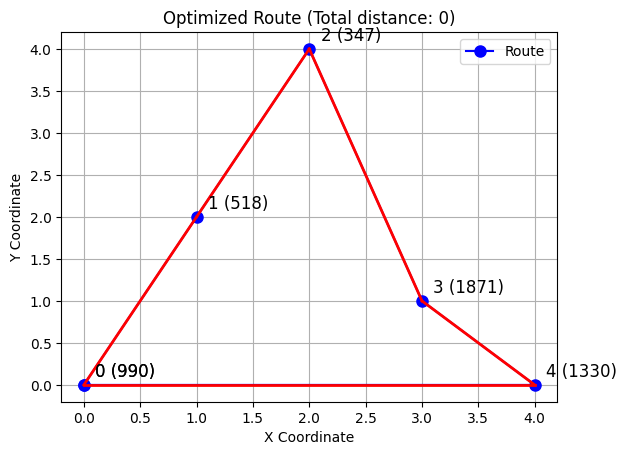

In [4]:
import random
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# 데이터 모델 생성
def create_data_model():
    data = {}
    # 거리 행렬 (임의의 거리 행렬 사용)
    data['distance_matrix'] = [
        [0, 10, 15, 20, 25],
        [10, 0, 35, 25, 30],
        [15, 35, 0, 30, 5],
        [20, 25, 30, 0, 15],
        [25, 30, 5, 15, 0]
    ]

    # 각 정류장의 인구수 (랜덤으로 생성: 0 ~ 2000 범위)
    data['population'] = [random.randint(0, 2000) for _ in range(5)]  # 5개의 정류장에 대한 랜덤 인구수
    data['num_vehicles'] = 1  # 차량 개수
    data['depot'] = 0  # 시작 지점 (첫 번째 정류장)

    # 각 정류장의 좌표 (임의로 설정)
    data['locations'] = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 0)]

    return data

# 인구수 우선 순위와 거리 고려 최적화 함수
def main():
    data = create_data_model()

    # 라우팅 인덱스 관리자 생성
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])

    # 라우팅 모델 생성
    routing = pywrapcp.RoutingModel(manager)

    # 거리 계산 함수 정의
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    # 인구수와 거리의 비율을 고려한 우선순위 계산 함수
    def population_distance_ratio_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)

        # 거리 계산
        distance = data['distance_matrix'][from_node][to_node]

        # 인구수 비율 계산
        population_ratio = data['population'][from_node] / (data['population'][to_node] if data['population'][to_node] != 0 else 1)

        # 거리 비율 계산
        distance_ratio = distance / 10.0  # 거리 비율을 적절히 조정 (조정이 필요함)

        # 가중치 조정
        # 인구수와 거리를 모두 고려: (인구수 비율 * 거리 비율을 반영한 가중치)
        weighted_ratio = (population_ratio * 2) / (distance_ratio + 1)  # 인구수에 2배의 가중치 부여

        return weighted_ratio

    # 트랜싯 콜백 인덱스 등록 (인구수와 거리의 비율 고려)
    transit_callback_index = routing.RegisterTransitCallback(population_distance_ratio_callback)

    # 각 아크의 비용 설정
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 검색 파라미터 설정
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC

    # 최적화 문제 해결
    solution = routing.SolveWithParameters(search_parameters)

    # 해결책 출력 및 시각화
    if solution:
        print_solution(manager, routing, solution)
        visualize_route(manager, routing, solution, data['locations'], data['population'])

# 솔루션 출력 함수
def print_solution(manager, routing, solution):
    total_distance = 0
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    route.append(manager.IndexToNode(index))
    print('Route:', route)
    print('Total distance:', total_distance)
    return route

# 동선 시각화 함수
def visualize_route(manager, routing, solution, locations, population):
    total_distance = 0
    index = routing.Start(0)
    route = [manager.IndexToNode(index)]

    # 경로를 따라 정류장 순서대로 방문
    while not routing.IsEnd(index):
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route.append(manager.IndexToNode(index))
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)

    # 시각화: 정류장 및 경로 표시
    fig, ax = plt.subplots()

    # 정류장 위치 표시
    x_coords = [locations[i][0] for i in route]
    y_coords = [locations[i][1] for i in route]
    ax.plot(x_coords, y_coords, 'bo-', markersize=8, label="Route")

    # 정류장 번호 및 인구수 표시
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        ax.text(x + 0.1, y + 0.1, f'{route[i]} ({population[route[i]]})', fontsize=12)

    # 경로 연결선 그리기
    for i in range(len(route) - 1):
        start = locations[route[i]]
        end = locations[route[i + 1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r-', linewidth=2)

    ax.set_title(f"Optimized Route (Total distance: {total_distance})")
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.grid(True)
    ax.legend()
    plt.show()

# 실행
if __name__ == '__main__':
    main()


Route: [0, 3, 1, 4, 2, 0]
Total distance: 0


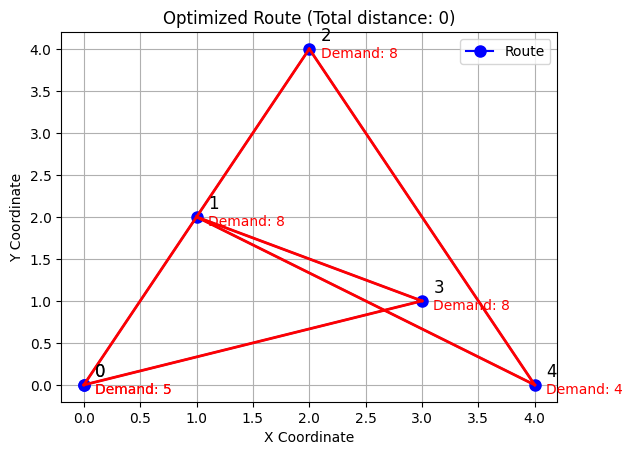

In [5]:
import random
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# 데이터 모델 생성
def create_data_model():
    data = {}
    # 거리 행렬 (임의의 거리 행렬 사용)
    data['distance_matrix'] = [
        [0, 10, 15, 20, 25],
        [10, 0, 35, 25, 30],
        [15, 35, 0, 30, 5],
        [20, 25, 30, 0, 15],
        [25, 30, 5, 15, 0]
    ]

    # 각 정류장의 인구수
    data['population'] = [500, 1000, 1500, 1200, 800]  # 예시 인구수
    data['num_vehicles'] = 1  # 차량 개수
    data['depot'] = 0  # 시작 지점 (첫 번째 정류장)

    # 각 정류장의 좌표 (임의로 설정)
    data['locations'] = [(0, 0), (1, 2), (2, 4), (3, 1), (4, 0)]

    # 각 정류장의 수요 (랜덤으로 0 ~ 10 사이의 수요 값 생성)
    data['demand'] = [random.randint(0, 10) for _ in range(5)]

    return data

# 인구수 우선 순위와 거리 고려 최적화 함수
def main():
    data = create_data_model()

    # 라우팅 인덱스 관리자 생성
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])

    # 라우팅 모델 생성
    routing = pywrapcp.RoutingModel(manager)

    # 거리 계산 함수 정의
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    # 수요가 있는 정류장만 방문하도록 하는 함수
    def demand_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)

        # 수요가 0인 정류장은 경로에 포함되지 않도록 높은 비용 반환
        if data['demand'][from_node] == 0 or data['demand'][to_node] == 0:
            return float('inf')  # 수요가 없는 정류장은 지나가지 않음

        return data['distance_matrix'][from_node][to_index]

    # 트랜싯 콜백 인덱스 등록 (거리 및 수요 고려)
    transit_callback_index = routing.RegisterTransitCallback(demand_callback)

    # 각 아크의 비용 설정
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 검색 파라미터 설정
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC

    # 최적화 문제 해결
    solution = routing.SolveWithParameters(search_parameters)

    # 해결책 출력 및 시각화
    if solution:
        print_solution(manager, routing, solution)
        visualize_route(manager, routing, solution, data['locations'], data['demand'])

# 솔루션 출력 함수
def print_solution(manager, routing, solution):
    total_distance = 0
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    route.append(manager.IndexToNode(index))
    print('Route:', route)
    print('Total distance:', total_distance)
    return route

# 동선 시각화 함수
def visualize_route(manager, routing, solution, locations, demand):
    total_distance = 0
    index = routing.Start(0)
    route = [manager.IndexToNode(index)]

    # 경로를 따라 정류장 순서대로 방문
    while not routing.IsEnd(index):
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route.append(manager.IndexToNode(index))
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)

    # 시각화: 정류장 및 경로 표시
    fig, ax = plt.subplots()

    # 정류장 위치 표시
    x_coords = [locations[i][0] for i in route]
    y_coords = [locations[i][1] for i in route]
    ax.plot(x_coords, y_coords, 'bo-', markersize=8, label="Route")

    # 정류장 번호 표시
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        ax.text(x + 0.1, y + 0.1, f'{route[i]}', fontsize=12)
        # 수요가 있는 정류장은 수요 표시
        if demand[route[i]] > 0:
            ax.text(x + 0.1, y - 0.1, f'Demand: {demand[route[i]]}', fontsize=10, color='red')

    # 경로 연결선 그리기
    for i in range(len(route) - 1):
        start = locations[route[i]]
        end = locations[route[i + 1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r-', linewidth=2)

    ax.set_title(f"Optimized Route (Total distance: {total_distance})")
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.grid(True)
    ax.legend()
    plt.show()

# 실행
if __name__ == '__main__':
    main()


Optimized Route: [(0, 0, 0, 0, 0), (1, 1, 7, 4, 7195), (2, 1, 9, 1, 6650), (5, 4, 10, 3, 2789), (4, 8, 9, 0, 6890), (3, 10, 1, 8, 9349)]
Total Distance: 24.60 units


<ipython-input-6-5225756c8143>:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-6-5225756c8143>:86: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


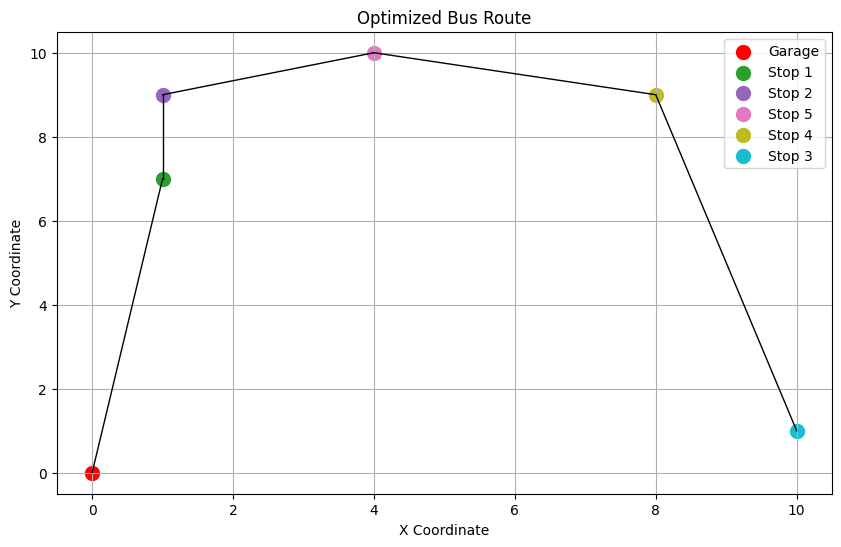

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 수요와 인구수는 랜덤으로 생성
stops = [
    (1, 1, 7, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 1
    (2, 1, 9, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 2
    (3, 10, 1, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 3
    (4, 8, 9, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 4
    (5, 4, 10, random.randint(0, 10), random.randint(1000, 10000))  # Stop 5
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Demand', 'Population'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0, 0)] + [(row['Stop'], row['X'], row['Y'], row['Demand'], row['Population']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수 (최소 거리 기준)
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = {stop[0] for stop in stops} - {stops[0][0]}  # 차고지는 제외한 나머지 정류장들

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 각 정류장에 대해 거리만 계산하여 선택
        next_stop = min(remaining_stops, key=lambda stop: distances[current_stop].get(stop, float('inf')))

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3]), int(stop[4])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)


Optimized Route: [(0, 0, 0, 0), (1, 3, 3, 7985), (3, 7, 6, 4016), (5, 8, 7, 6015), (4, 10, 5, 1159), (2, 3, 8, 3725)]
Total Distance: 21.10 units


<ipython-input-7-bf403e433ba9>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-7-bf403e433ba9>:88: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


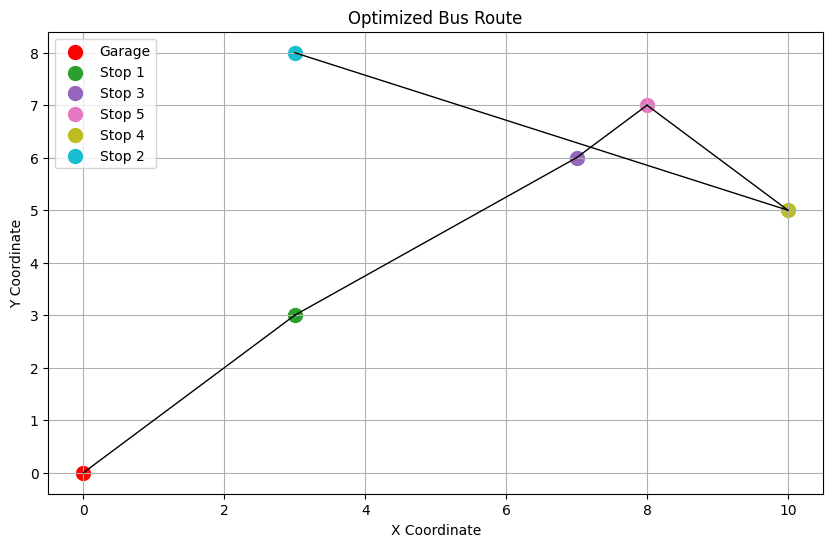

In [7]:
# 정류장 랜덤에 인구수 고려
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from math import sqrt

# 랜덤 데이터 생성
np.random.seed(42)

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 임시 정류장 데이터 생성 (5개)
num_stops = 5
stops = []
for i in range(num_stops):
    x = random.randint(1, 10)
    y = random.randint(1, 10)
    population = random.randint(1000, 10000)  # 랜덤 인구수
    stops.append((i+1, x, y, population))

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Population'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0)] + [(row['Stop'], row['X'], row['Y'], row['Population']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = set([stop[0] for stop in stops]) - {stops[0][0]}

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리
        # next_stop을 선택할 때, 거리와 인구수를 기준으로 정렬
        next_stop = min(remaining_stops, key=lambda stop: (distances[current_stop].get(stop, float('inf')), -[s[3] for s in stops if s[0] == stop][0]))
        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)


Optimized Route: [(0, 0, 0, 0), (2, 1, 9, 8215), (1, 1, 7, 4693), (4, 8, 9, 9629), (5, 4, 10, 3872), (3, 10, 1, 6722)]
Total Distance: 33.28 units


<ipython-input-8-7a4b2ea6e736>:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-8-7a4b2ea6e736>:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


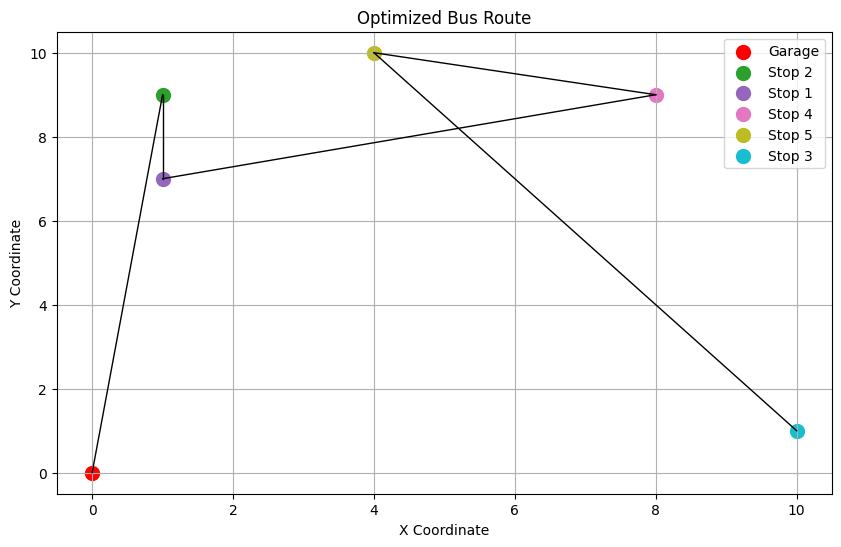

In [8]:
# 정류장 위치 고정 인구수 비율상 이동
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 인구수는 랜덤으로 생성
stops = [
    (1, 1, 7, random.randint(1000, 10000)),  # Stop 1
    (2, 1, 9, random.randint(1000, 10000)),  # Stop 2
    (3, 10, 1, random.randint(1000, 10000)),  # Stop 3
    (4, 8, 9, random.randint(1000, 10000)),  # Stop 4
    (5, 4, 10, random.randint(1000, 10000))  # Stop 5
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Population'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0)] + [(row['Stop'], row['X'], row['Y'], row['Population']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = set([stop[0] for stop in stops]) - {stops[0][0]}

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 거리와 인구수를 비율로 계산하여 정류장을 선택 (가중치 적용)
        next_stop = min(remaining_stops, key=lambda stop: (distances[current_stop].get(stop, float('inf')) / [s[3] for s in stops if s[0] == stop][0]))  # 거리/인구수 비율

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)


Optimized Route: [(0, 0, 0, 0), (1, 1, 7, 10), (2, 1, 9, 8), (5, 4, 10, 8), (4, 8, 9, 9), (3, 10, 1, 8)]
Total Distance: 24.60 units


<ipython-input-24-34c0bf7eafbc>:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-24-34c0bf7eafbc>:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


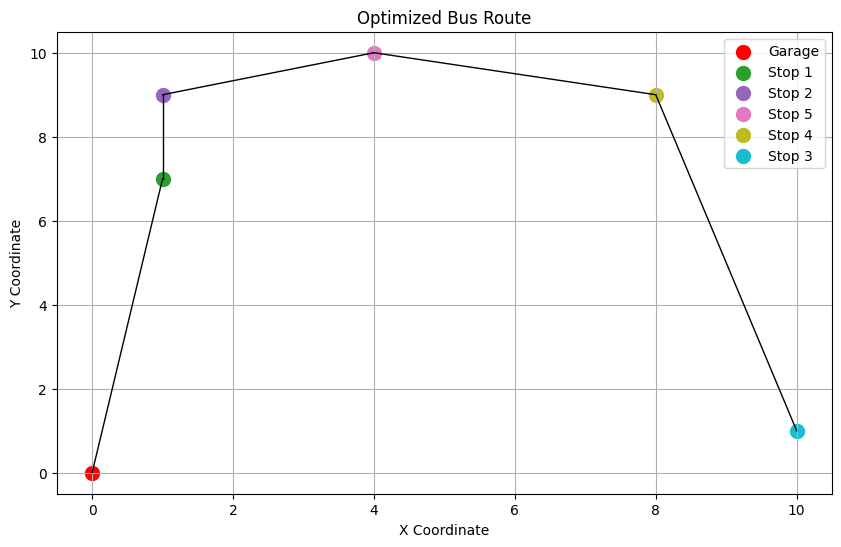

In [24]:
# 정류장 고정 수요랜덤으로하고 0일경우 들르지않음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 수요는 랜덤으로 생성 (0 ~ 10)
stops = [
    (1, 1, 7, random.randint(0, 10)),  # Stop 1
    (2, 1, 9, random.randint(0, 10)),  # Stop 2
    (3, 10, 1, random.randint(0, 10)),  # Stop 3
    (4, 8, 9, random.randint(0, 10)),  # Stop 4
    (5, 4, 10, random.randint(0, 10))  # Stop 5
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Demand'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0)] + [(row['Stop'], row['X'], row['Y'], row['Demand']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = {stop[0] for stop in stops} - {stops[0][0]}  # 차고지는 제외한 나머지 정류장들

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 수요가 0인 정류장은 제외하고 최적화
        remaining_stops_with_demand = [stop for stop in remaining_stops if [s[3] for s in stops if s[0] == stop][0] > 0]

        if not remaining_stops_with_demand:
            break

        # 거리와 수요를 고려하여 정류장 선택 (수요가 0인 곳은 제외)
        next_stop = min(remaining_stops_with_demand, key=lambda stop: distances[current_stop].get(stop, float('inf')))

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)



Optimized Route: [(0, 0, 0, 0, 0), (2, 1, 9, 9, 7417), (1, 1, 7, 6, 1891), (3, 10, 1, 7, 3951), (4, 8, 9, 3, 6215), (5, 4, 10, 1, 8287)]
Total Distance: 34.24 units


<ipython-input-27-7e7b1897b9ce>:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-27-7e7b1897b9ce>:97: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


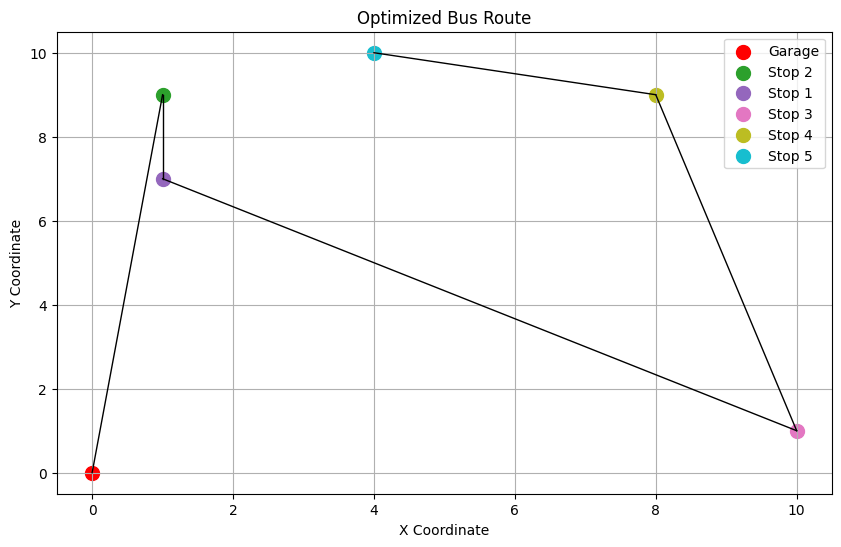

In [27]:
#차고지 적용 및 정류장 고정 수요&인구수 포함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 수요와 인구수는 랜덤으로 생성
stops = [
    (1, 1, 7, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 1
    (2, 1, 9, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 2
    (3, 10, 1, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 3
    (4, 8, 9, random.randint(0, 10), random.randint(1000, 10000)),  # Stop 4
    (5, 4, 10, random.randint(0, 10), random.randint(1000, 10000))  # Stop 5
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Demand', 'Population'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0, 0)] + [(row['Stop'], row['X'], row['Y'], row['Demand'], row['Population']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = {stop[0] for stop in stops} - {stops[0][0]}  # 차고지는 제외한 나머지 정류장들

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 수요가 0인 정류장은 제외
        remaining_stops_with_demand = [stop for stop in remaining_stops if [s[3] for s in stops if s[0] == stop][0] > 0]

        if not remaining_stops_with_demand:
            break

        # 각 정류장에 대해 거리, 수요, 인구수 가중치 계산 (인구수 * 수요 비례)
        next_stop = min(remaining_stops_with_demand, key=lambda stop: (
            distances[current_stop].get(stop, float('inf')) *
            (1 - [s[3] for s in stops if s[0] == stop][0] / 10) +  # 수요 비례
            [s[4] for s in stops if s[0] == stop][0] / 10000  # 인구수 비례 (10,000명 기준)
        ))

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3]), int(stop[4])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)


Optimized Route: [(0, 0, 0, 0, 0), (6, 4, 7, 15, 7000), (4, 8, 9, 13, 3500), (8, 2, 6, 13, 3000), (5, 4, 10, 11, 4000), (7, 3, 5, 10, 2000), (3, 10, 1, 10, 2500), (2, 1, 9, 1, 1500)]
Total Distance: 48.92 units


<ipython-input-49-b13f21b4dbfd>:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-49-b13f21b4dbfd>:100: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


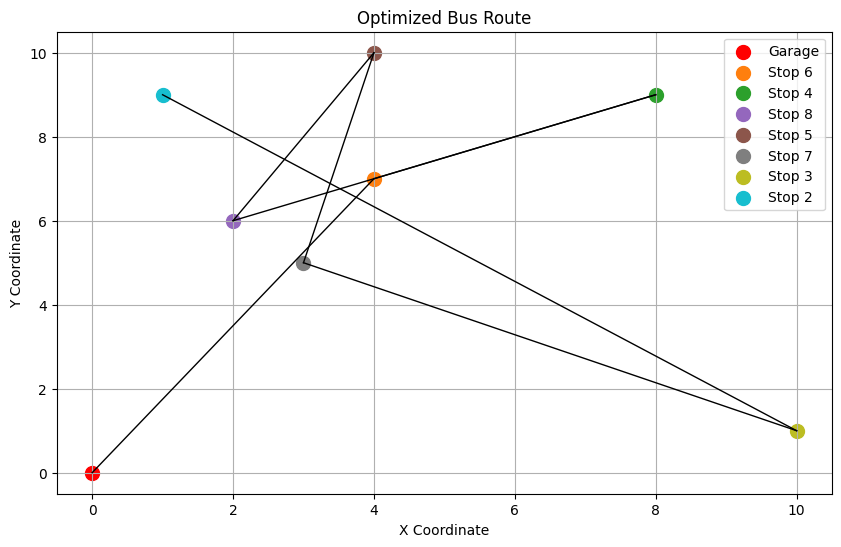

In [49]:
#차고지 적용 및 정류장 고정 수요&인구수 포함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 수요는 랜덤으로 생성 (0 ~ 10)
stops = [
    (1, 1, 7, random.randint(0, 15),5000),  # Stop 1
    (2, 1, 9, random.randint(0, 15),1500),  # Stop 2
    (3, 10, 1, random.randint(0, 15),2500),  # Stop 3
    (4, 8, 9, random.randint(0, 15),3500),  # Stop 4
    (5, 4, 10, random.randint(0, 15),4000),  # Stop 5
    (6, 4, 7, random.randint(0,15),7000),
    (7, 3, 5, random.randint(0,15),2000),
    (8, 2, 6, random.randint(0,15),3000)
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Demand', 'Population'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0, 0)] + [(row['Stop'], row['X'], row['Y'], row['Demand'], row['Population']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = {stop[0] for stop in stops} - {stops[0][0]}  # 차고지는 제외한 나머지 정류장들

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 수요가 0인 정류장은 제외
        remaining_stops_with_demand = [stop for stop in remaining_stops if [s[3] for s in stops if s[0] == stop][0] > 0]

        if not remaining_stops_with_demand:
            break

        # 각 정류장에 대해 거리, 수요, 인구수 가중치 계산 (인구수 * 수요 비례)
        next_stop = min(remaining_stops_with_demand, key=lambda stop: (
            distances[current_stop].get(stop, float('inf')) *
            (1 - [s[3] for s in stops if s[0] == stop][0] / 10) +  # 수요 비례
            [s[4] for s in stops if s[0] == stop][0] / 10000  # 인구수 비례 (10,000명 기준)
        ))

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3]), int(stop[4])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)


Optimized Route: [(0, 0, 0, 0), (1, 1, 7, 1), (2, 1, 9, 5), (5, 4, 10, 7), (4, 8, 9, 9), (3, 10, 1, 3)]
Total Distance: 24.60 units


<ipython-input-14-29ca2bc0b8cc>:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-14-29ca2bc0b8cc>:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


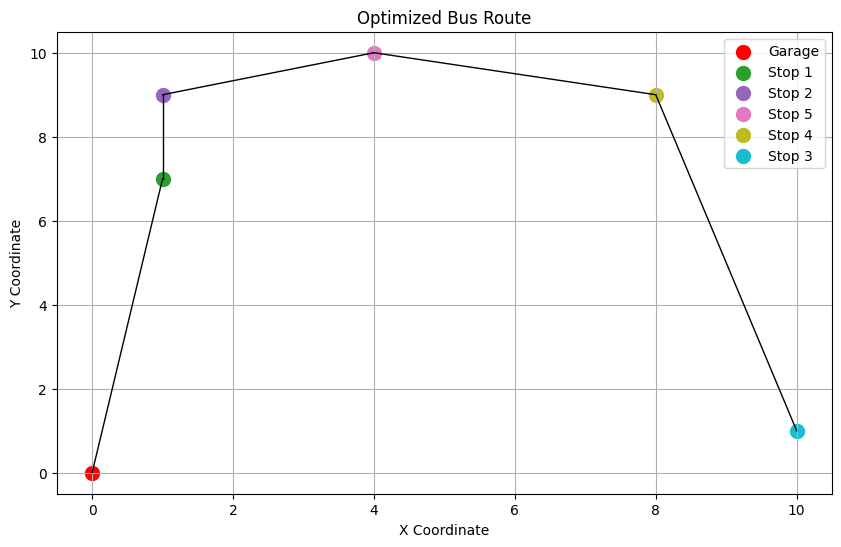

In [14]:
# 정류장 고정 수요랜덤으로하고 0일경우 들르지않음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 수요는 랜덤으로 생성 (0 ~ 10)
stops = [
    (1, 1, 7, 1),  # Stop 1
    (2, 1, 9, 5),  # Stop 2
    (3, 10, 1, 3),  # Stop 3
    (4, 8, 9, 9),  # Stop 4
    (5, 4, 10, 7)  # Stop 5
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Demand'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0)] + [(row['Stop'], row['X'], row['Y'], row['Demand']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = {stop[0] for stop in stops} - {stops[0][0]}  # 차고지는 제외한 나머지 정류장들

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 수요가 0인 정류장은 제외하고 최적화
        remaining_stops_with_demand = [stop for stop in remaining_stops if [s[3] for s in stops if s[0] == stop][0] > 0]

        if not remaining_stops_with_demand:
            break

        # 거리와 수요를 고려하여 정류장 선택 (수요가 0인 곳은 제외)
        next_stop = min(remaining_stops_with_demand, key=lambda stop: distances[current_stop].get(stop, float('inf')))

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)



Optimized Route: [(0, 0, 0, 0), (2, 1, 9, 4000), (1, 1, 7, 3000), (5, 4, 10, 1200), (4, 8, 9, 2000), (3, 10, 1, 1500)]
Total Distance: 27.67 units


<ipython-input-15-5f1b2b37e385>:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-15-5f1b2b37e385>:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


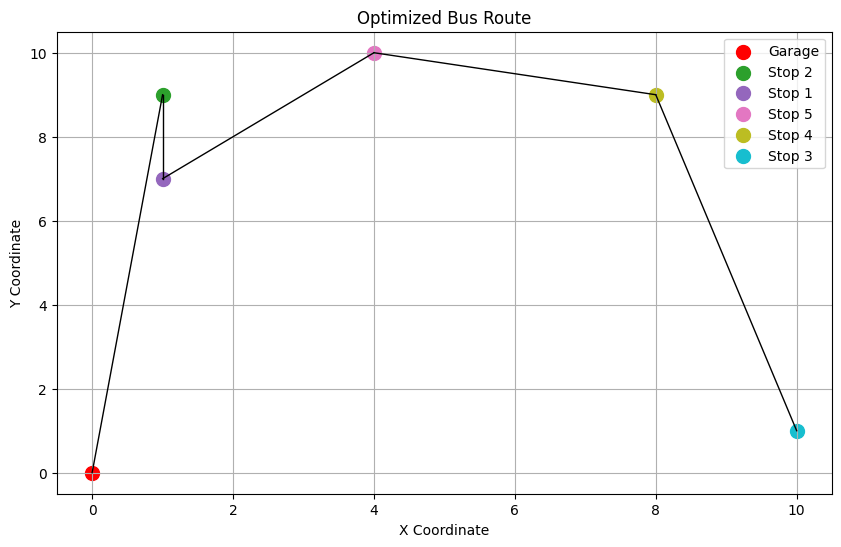

In [15]:
# 정류장 위치 고정 인구수 비율상 이동
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 인구수는 랜덤으로 생성
stops = [
    (1, 1, 7, 3000),  # Stop 1
    (2, 1, 9, 4000),  # Stop 2
    (3, 10, 1, 1500),  # Stop 3
    (4, 8, 9, 2000),  # Stop 4
    (5, 4, 10, 1200)  # Stop 5
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Population'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0)] + [(row['Stop'], row['X'], row['Y'], row['Population']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = set([stop[0] for stop in stops]) - {stops[0][0]}

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 거리와 인구수를 비율로 계산하여 정류장을 선택 (가중치 적용)
        next_stop = min(remaining_stops, key=lambda stop: (distances[current_stop].get(stop, float('inf')) / [s[3] for s in stops if s[0] == stop][0]))  # 거리/인구수 비율

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)


Optimized Route: [(0, 0, 0, 0), (7, 3, 5, 4), (8, 2, 6, 3), (1, 1, 7, 15), (2, 1, 9, 7), (5, 4, 10, 3), (6, 4, 7, 15), (4, 8, 9, 3), (3, 10, 1, 5)]
Total Distance: 29.54 units


<ipython-input-47-4791e508559b>:89: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용
<ipython-input-47-4791e508559b>:96: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')


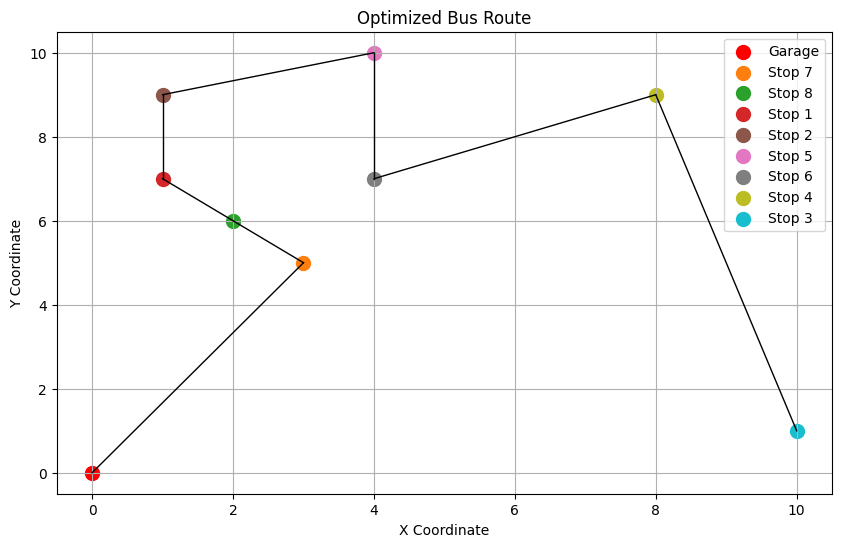

In [47]:
# 정류장 고정 수요랜덤으로하고 0일경우 들르지않음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

# 버스 차고지 위치 (고정)
garage = (0, 0)

# 고정된 정류장 위치 (5개), 수요는 랜덤으로 생성 (0 ~ 10)
stops = [
    (1, 1, 7, random.randint(0, 15)),  # Stop 1
    (2, 1, 9, random.randint(0, 15)),  # Stop 2
    (3, 10, 1, random.randint(0, 15)),  # Stop 3
    (4, 8, 9, random.randint(0, 15)),  # Stop 4
    (5, 4, 10, random.randint(0, 15)),  # Stop 5
    (6, 4, 7, random.randint(0,15)),
    (7, 3, 5, random.randint(0,15)),
    (8, 2, 6, random.randint(0,15))
]

# 정류장 정보 DataFrame 생성
stops_df = pd.DataFrame(stops, columns=['Stop', 'X', 'Y', 'Demand'])

# 차고지 포함된 리스트
all_stops = [(0, garage[0], garage[1], 0)] + [(row['Stop'], row['X'], row['Y'], row['Demand']) for _, row in stops_df.iterrows()]

# 두 지점 사이의 유클리드 거리 계산
def calculate_distance(stop1, stop2):
    return sqrt((stop1[1] - stop2[1])**2 + (stop1[2] - stop2[2])**2)

# 정류장 간 거리 계산
distances = {}
for stop1 in all_stops:
    distances[stop1[0]] = {}
    for stop2 in all_stops:
        if stop1 != stop2:
            distances[stop1[0]][stop2[0]] = calculate_distance(stop1, stop2)

# 정류장 방문 순서 최적화 함수
def optimize_route(stops, distances):
    route = [stops[0]]  # 차고지부터 시작
    remaining_stops = {stop[0] for stop in stops} - {stops[0][0]}  # 차고지는 제외한 나머지 정류장들

    while remaining_stops:
        current_stop = route[-1][0]  # 현재 정류장은 번호로만 처리

        # 수요가 0인 정류장은 제외하고 최적화
        remaining_stops_with_demand = [stop for stop in remaining_stops if [s[3] for s in stops if s[0] == stop][0] > 0]

        if not remaining_stops_with_demand:
            break

        # 거리와 수요를 고려하여 정류장 선택 (수요가 0인 곳은 제외)
        next_stop = min(remaining_stops_with_demand, key=lambda stop: distances[current_stop].get(stop, float('inf')))

        route.append(next(stop for stop in stops if stop[0] == next_stop))
        remaining_stops.remove(next_stop)

    # np.int64를 int로 변환하여 반환
    route = [(int(stop[0]), int(stop[1]), int(stop[2]), int(stop[3])) for stop in route]
    return route

# 최적화된 경로 찾기
optimized_route = optimize_route(all_stops, distances)

# 최적화된 경로 출력
print("Optimized Route:", optimized_route)

# 총 거리 계산
def calculate_total_distance(optimized_route, distances):
    total_distance = 0  # 총 거리 초기화
    for i in range(1, len(optimized_route)):
        # 두 정류장 간 거리 계산
        dist = distances[optimized_route[i-1][0]].get(optimized_route[i][0], float('inf'))
        total_distance += dist
    return total_distance

# 총 거리 출력
total_distance = calculate_total_distance(optimized_route, distances)
print(f"Total Distance: {total_distance:.2f} units")

# 최적화된 경로 시각화
def plot_route(optimized_route):
    plt.figure(figsize=(10, 6))

    # 정류장 번호에 따른 색상 지정 (여기서는 색상 맵을 사용)
    colors = plt.cm.get_cmap("tab10", len(optimized_route))  # "tab10" 색상 맵 사용

    # 각 정류장 표시
    for idx, stop in enumerate(optimized_route):
        # 차고지 (Stop 0)은 별도로 빨간색으로 설정하고, 나머지는 다른 색으로 표시
        color = 'red' if stop[0] == 0 else colors(idx)  # 차고지는 빨간색, 나머지는 자동 색상

        plt.scatter(stop[1], stop[2], s=100, c=color, label=f'Stop {stop[0]}' if stop[0] != 0 else 'Garage')

    # 경로 연결선 그리기
    for i in range(1, len(optimized_route)):
        plt.plot([optimized_route[i-1][1], optimized_route[i][1]],
                 [optimized_route[i-1][2], optimized_route[i][2]], 'k-', lw=1)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimized Bus Route')
    plt.legend()
    plt.grid(True)
    plt.show()

# 경로 시각화
plot_route(optimized_route)